## NeuralProphetのサンプルコード

In [1]:
%load_ext lab_black

In [2]:
import numpy as np

# ライブラリーのインポート
import pandas as pd
import seaborn as sns
from matplotlib import pylab as plt

%matplotlib inline

import warnings

# NeuralProphet
from neuralprophet import NeuralProphet

# 評価指標
from sklearn.metrics import mean_absolute_error

warnings.filterwarnings("ignore")

In [3]:
# https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/AirPassengers.html
df = pd.read_csv("../../data/AirPassengers.csv")

# float型に変換
df["#Passengers"] = df["#Passengers"].astype("float64")
df = df.rename(columns={"#Passengers": "Passengers"})

# datetime型に変換にする
df.Month = pd.to_datetime(df.Month)

# データの中身を確認
df.head()

,Month,Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


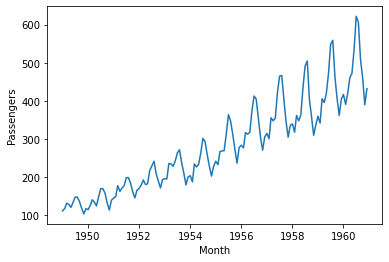

In [4]:
fig, ax = plt.subplots()
a = sns.lineplot(x="Month", y="Passengers", data=df)
plt.show()

In [5]:
df = df.rename(columns={"Month": "ds", "Passengers": "y"})
df = df[["ds", "y"]]

# 学習データとテストデータの分割
test_length = 12
df_train = df.iloc[:-test_length]
df_test = df.iloc[-test_length:]

In [6]:
params = {
    "growth": "linear",
    "changepoints": None,
    "n_changepoints": 10,
    "changepoints_range": 0.9,
    "trend_reg": 0,
    "trend_reg_threshold": False,
    "yearly_seasonality": True,
    "weekly_seasonality": False,
    "daily_seasonality": False,
    "seasonality_mode": "multiplicative",
    "seasonality_reg": 0,
    "n_forecasts": 1,
    "n_lags": 0,
    "num_hidden_layers": 0,
    "d_hidden": None,
    "ar_sparsity": None,
    "learning_rate": None,
    "epochs": 1000,
    "batch_size": None,
    "loss_func": "Huber",
    "train_speed": None,
    "normalize": "auto",
    "impute_missing": True,
}

- 学習データ
- validate_each_epoch：各エポックの検証データでモデルのパフォーマンスを検証するかどうかを示すフラグ。
- valid_p：検証に使用する必要があるデータの割合を示す0から1の間の浮動小数点数。
- plot_live_loss：モデルのトレーニングと検証の損失のライブプロットを生成するかどうかを示すフラグ。

In [7]:
%%time
model = NeuralProphet(**params)
model.fit(
    df_train, validate_each_epoch=True, valid_p=0.2, freq="M", plot_live_loss=True
)

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/neuralprophet/forecaster.py", line 585, in _train
    from livelossplot import PlotLosses
ModuleNotFoundError: No module named 'livelossplot'
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 3.51E-01
Epoch[1000/1000]: 100%|██████████| 1000/1000 [01:43<00:00,  9.69it/s, SmoothL1Loss=0.000153, MAE=4.17, RegLoss=0, MAE_val=23.7, SmoothL1Loss_val=0.00368]


CPU times: user 1min 33s, sys: 6.12 s, total: 1min 39s
Wall time: 1min 44s


,SmoothL1Loss,MAE,RegLoss,SmoothL1Loss_val,MAE_val
0,0.846020,394.107819,0.0,0.142078,131.121429
1,0.436754,246.462372,0.0,0.266643,217.086945
2,0.273350,187.976948,0.0,0.549606,326.454712
3,0.220006,173.155781,0.0,0.668768,365.875061
4,0.202043,166.178168,0.0,0.623529,351.346313
...,...,...,...,...,...
995,0.000153,4.172291,0.0,0.003675,23.732872
996,0.000153,4.172146,0.0,0.003675,23.733406
997,0.000153,4.172654,0.0,0.003678,23.743000
998,0.000153,4.172536,0.0,0.003677,23.741648


In [8]:
# NeuralProphet 予測モデルの精度検証用データの生成
future = model.make_future_dataframe(
    df_train, periods=test_length, n_historic_predictions=len(df_train)
)
pred = model.predict(future)

#### 可視化

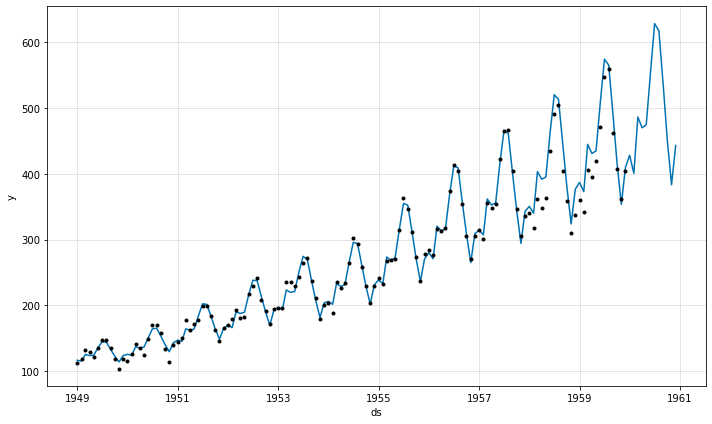

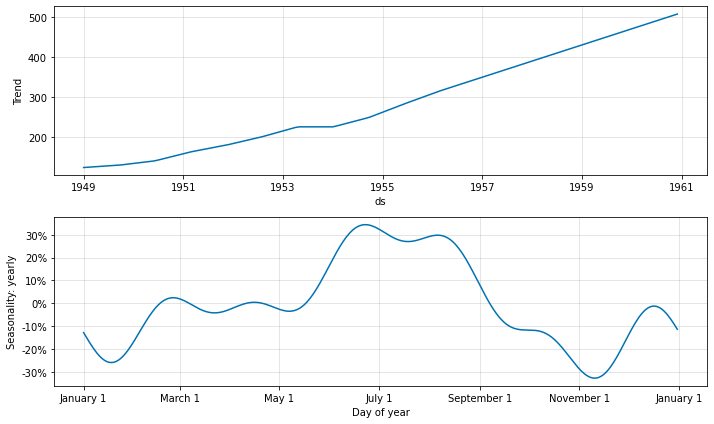

In [9]:
# NeuralProphet 予測モデルの予測結果（学習データ期間＋テストデータ期間）
pred_plot = model.plot(pred)  # 予想値（点は学習データの実測値）
component_plot = model.plot_components(pred)  # モデルの要素分解

#### 評価指標

In [10]:
# テストデータに予測値を結合
df_test["NeuralProphet Predict"] = pred.iloc[-test_length:].loc[:, "yhat1"]

In [11]:
# NeuralProphet 予測モデルの精度検証（テストデータ期間）
print("MAE(NeuralProphet):")
print(mean_absolute_error(df_test["y"], df_test["NeuralProphet Predict"]))

MAE(NeuralProphet):
16.130884806315105
